In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
train = pd.read_csv("../../../card/train.csv",index_col=0)
test = pd.read_csv("../../../card/test.csv",index_col=0)
sub  = pd.read_csv('../../../card/sample_submission.csv')

In [5]:
model_train = train.copy()
model_test  = test.copy()

In [6]:
NumericCol=train.select_dtypes(include=np.number).columns
StrCol=train.select_dtypes(include=object).columns

In [7]:
def TransDayToDate(df):
    target = df.copy()
    target.loc[target.DAYS_EMPLOYED >0,'DAYS_EMPLOYED'] =0
    target['age'] = round(-target.DAYS_BIRTH/ (365.25) +1)
    target['DAYS_EMPLOYED']  =-target['DAYS_EMPLOYED']
    target['begin_month']    =- target['begin_month']
    
    
    return target

trainTime =TransDayToDate(train)
testTime =TransDayToDate(test)

drop_col = ['DAYS_BIRTH','FLAG_MOBIL']

try:
    model_train = trainTime.drop(drop_col,axis=1)
    model_test = testTime.drop(drop_col,axis=1)
except:
    pass

from sklearn.ensemble import RandomForestClassifier

def checkUniqueObject(train,test):
    target_col = train.select_dtypes(include= object).columns
    
    check =0
    for col in target_col:
        trainU = train[col].unique()
        testU  = test[col].unique()

        if set(trainU) != set(testU):
            print(col,' have not same Unique values')
            check=1
            
    if check ==0:
        print('all columns have Same Unique values')

checkUniqueObject(train,test)

def LabelEn(train,test):
    trainLa = train.copy()
    testLa  = test.copy()
    
    from sklearn.preprocessing import LabelEncoder
    target_col = train.select_dtypes(include= object).columns
    for col in target_col:
        le = LabelEncoder()
        le.fit(trainLa[col])
        trainLa[col] = le.transform(trainLa[col])
        testLa[col] = le.transform(testLa[col])

    
    return trainLa , testLa

trainLa , testLa = LabelEn(model_train,model_test)

In [13]:
x = trainLa.drop('credit',axis=1)
y = trainLa['credit']

In [14]:
def rf_model(x,y,random_state=42):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import log_loss
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier(random_state=43)
    rf.fit(X_train,y_train)  
    
    clf_probs = rf.predict_proba(X_test)
    score = log_loss(y_test, clf_probs)
    print('score ',score)
    
    plt.figure(figsize=(20,10))
    plt.bar(x.columns, rf.feature_importances_)
    plt.xticks(rotation=30)
    plt.show()
    return rf
    

score  0.8551647463044392


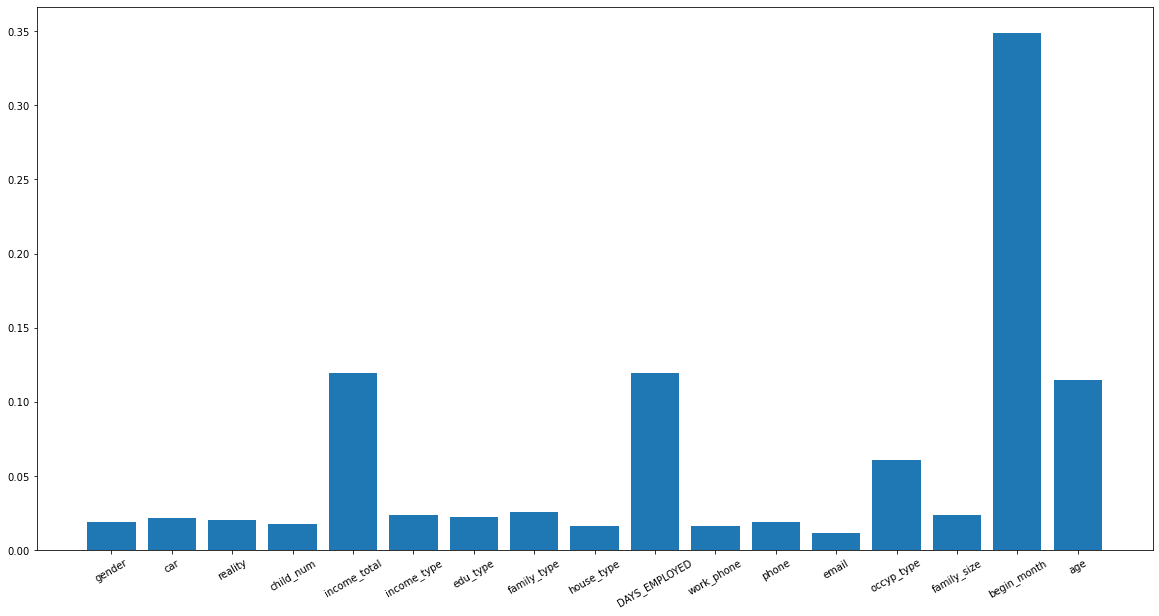

In [15]:
rf = rf_model(x,y,80)

In [16]:
target_data= ['income_total','DAYS_EMPLOYED','begin_month','age']

kmeans 1
score  0.9058075144085388


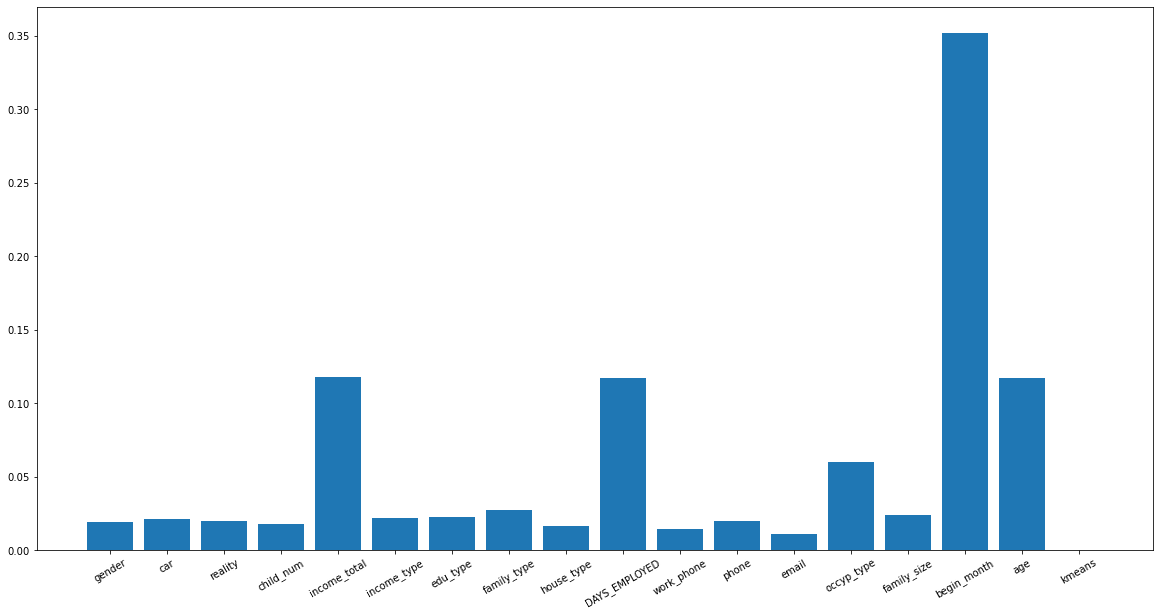

kmeans 2
score  0.8678155861730862


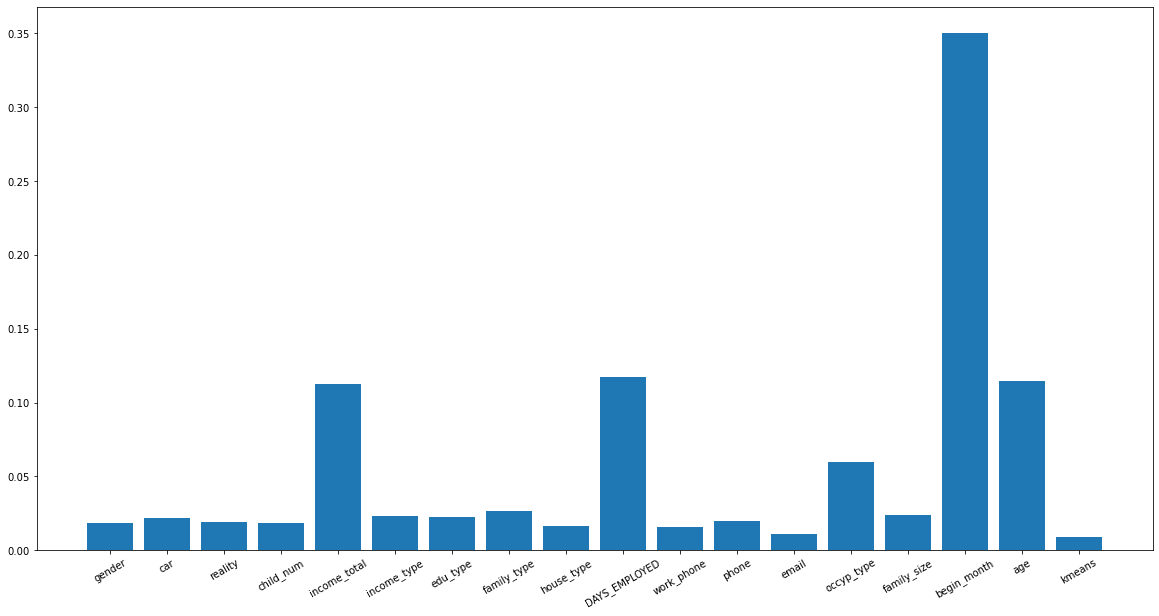

kmeans 3
score  0.8872641398931428


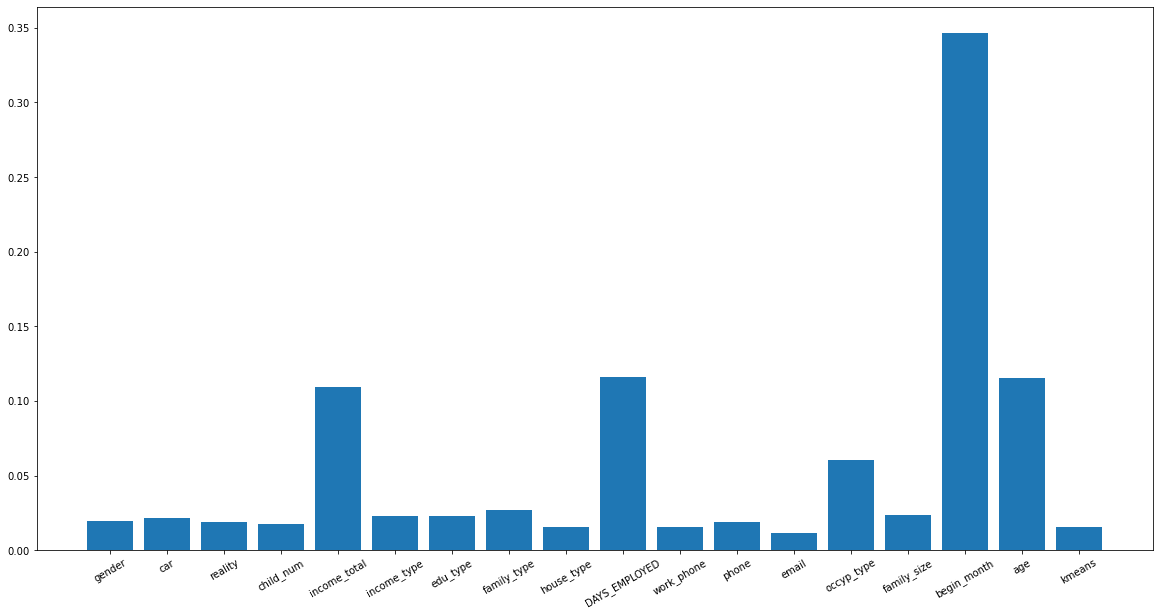

kmeans 4
score  0.9066113926752889


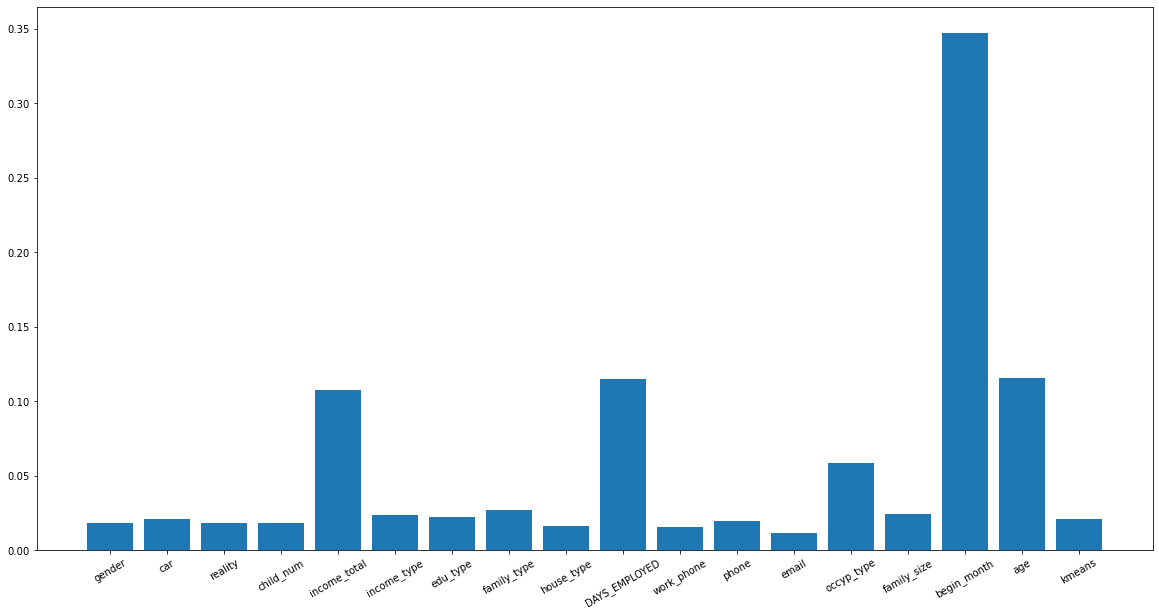

kmeans 5
score  0.8688739229564559


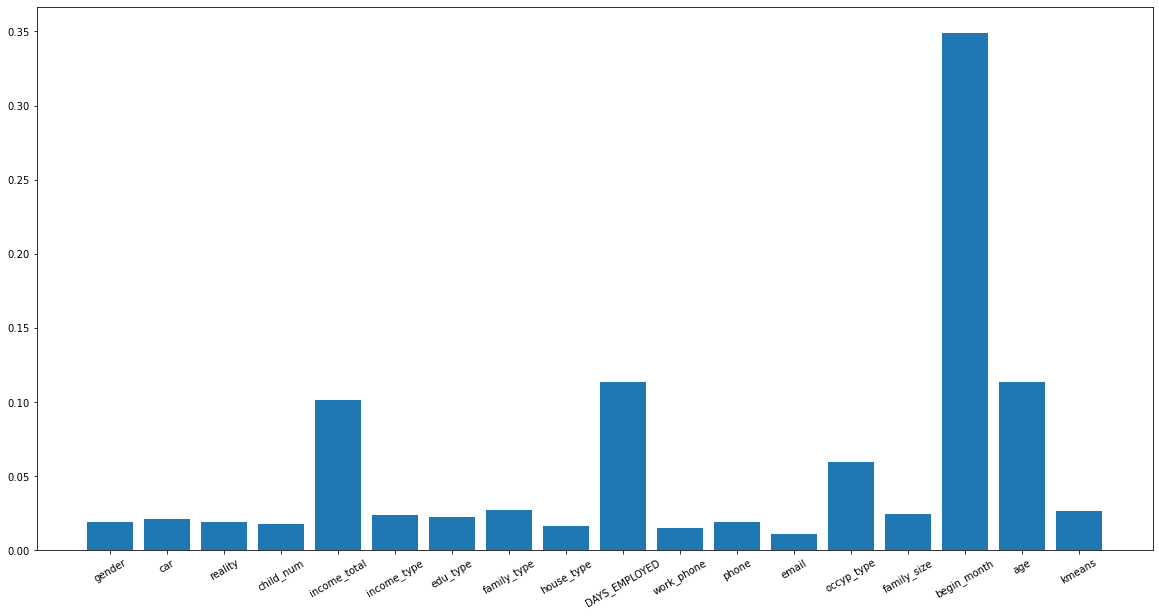

kmeans 6
score  0.8804428829640449


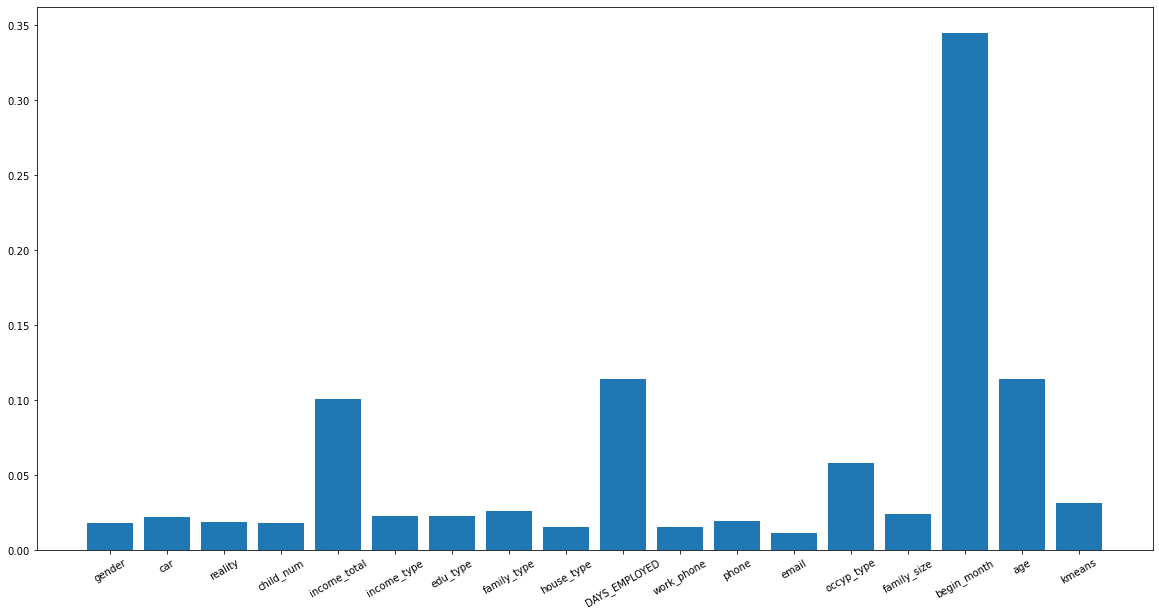

kmeans 7
score  0.8989300810736359


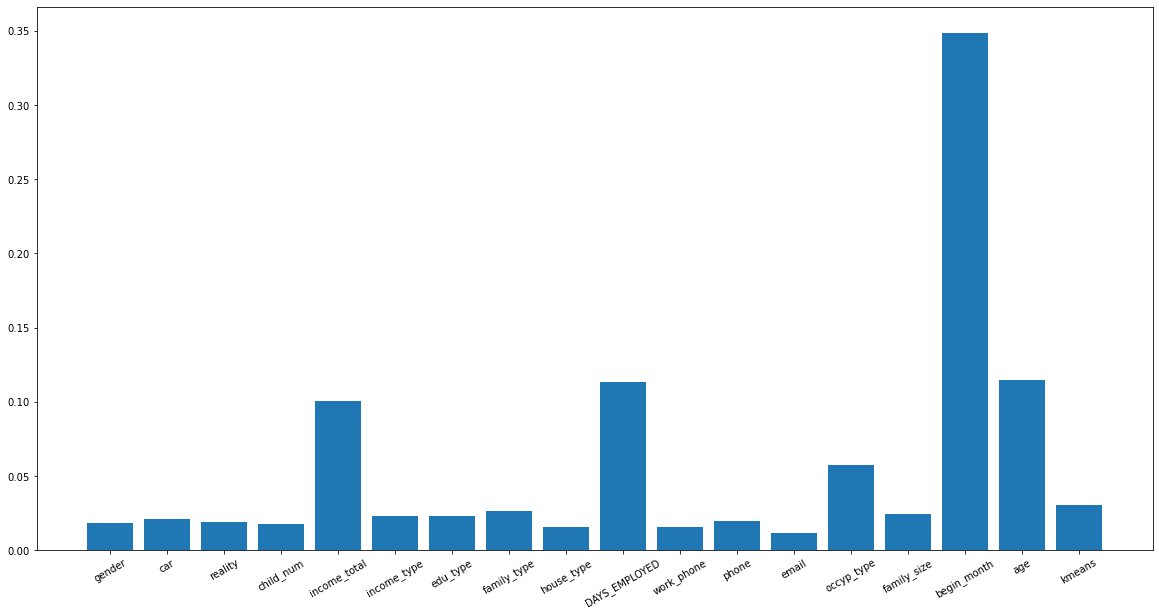

kmeans 8
score  0.8843490067701693


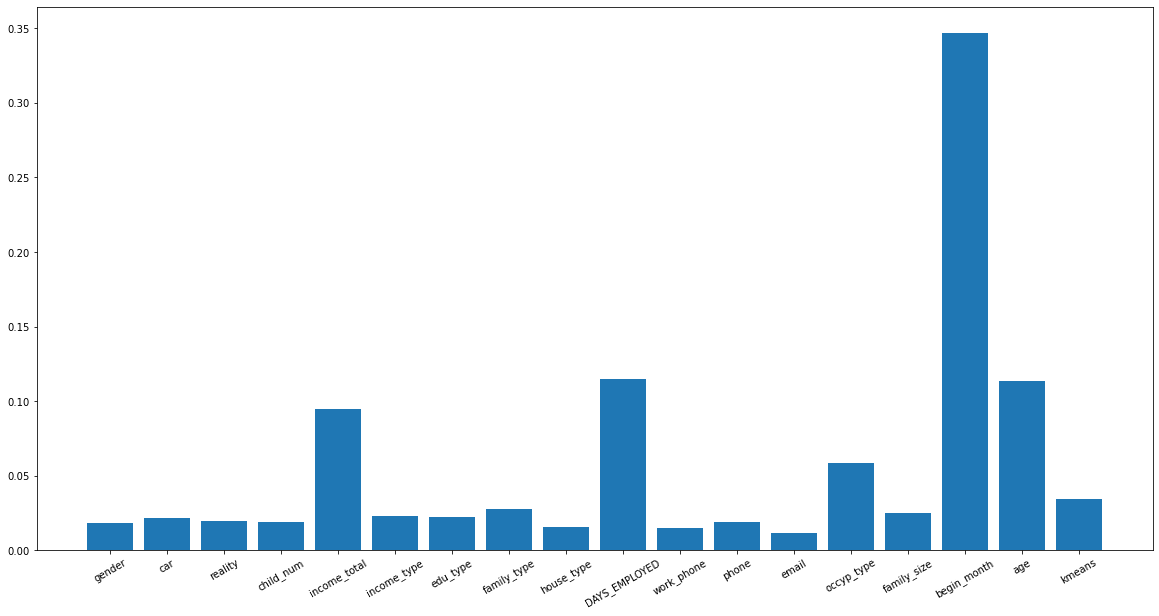

kmeans 9
score  0.8806111172247788


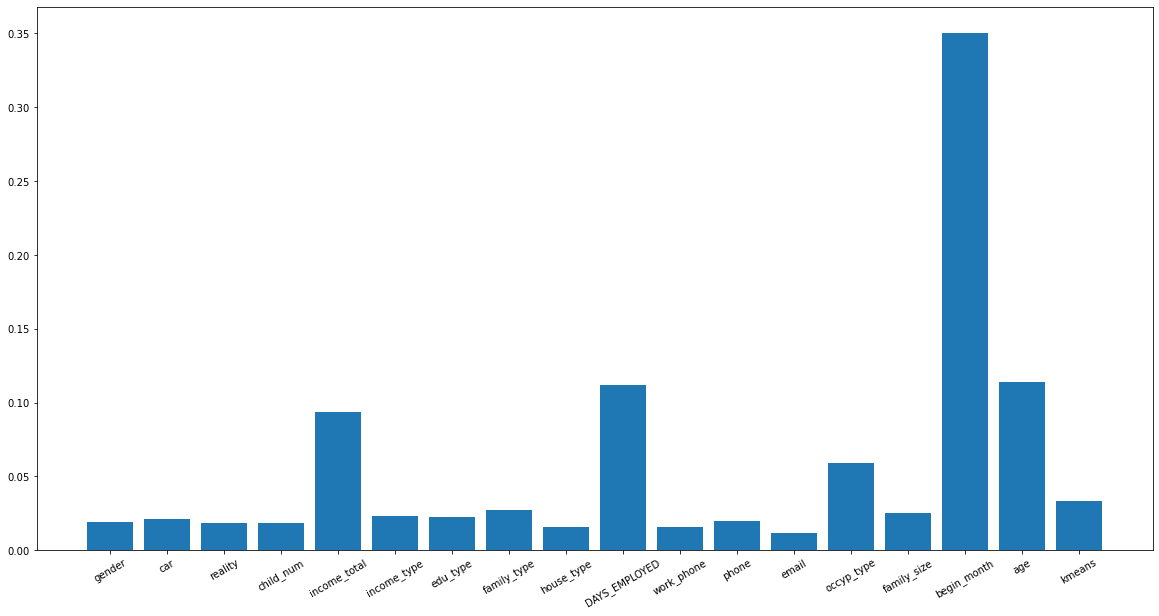

kmeans 10
score  0.8842335090826478


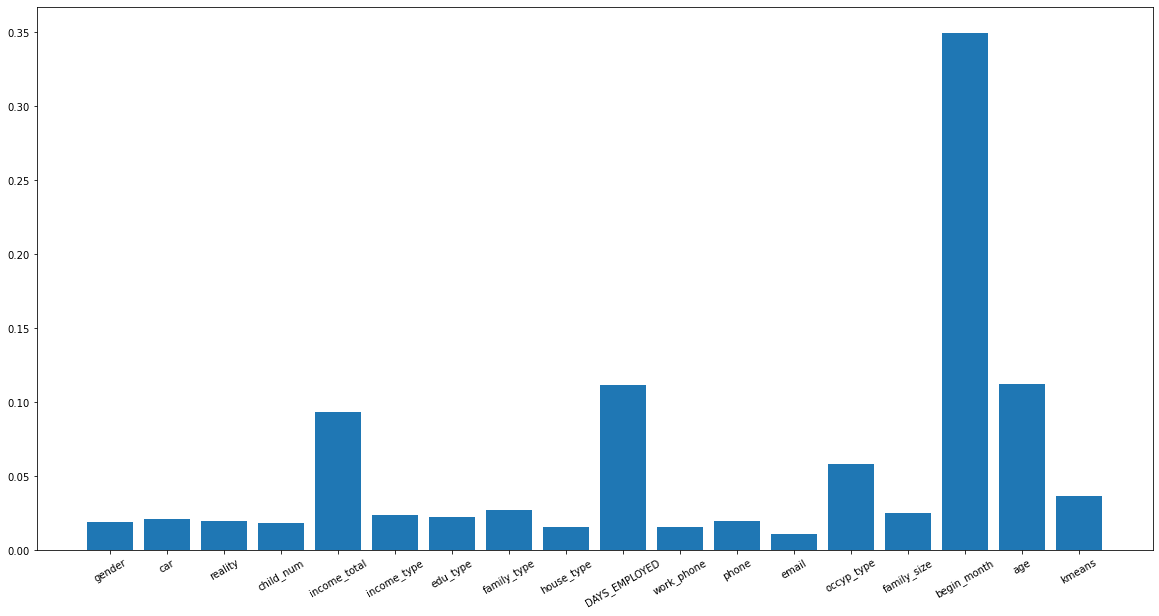

In [17]:
from sklearn.cluster import KMeans 


for v in range(1,11):
    xK =x.copy()
    testFi = testLa.copy()
    
    clusterDf = xK[target_data]
    kmeans = KMeans(n_clusters=v)
    kmeans.fit(clusterDf)
    kmeanPred = kmeans.predict(clusterDf)
    
    clusterDfy = testFi[target_data]
    kmeanPredy = kmeans.predict(clusterDfy)
    
    
    pd.DataFrame(kmeanPred).value_counts()

    
    xK['kmeans'] = kmeanPred
    testFi['kmeans'] = kmeanPredy
    
    print('kmeans',v)
    rf = rf_model(xK,y,80)

In [18]:
xBegin = x.copy()
yBegin = testLa.copy()

In [19]:
xBegin['begin_month_start']  =xBegin['begin_month'].map(lambda x: 1 if x<=4 else 0 )
yBegin['begin_month_start']  =yBegin['begin_month'].map(lambda x: 1 if x<=4 else 0 )

score  0.8931091032759493


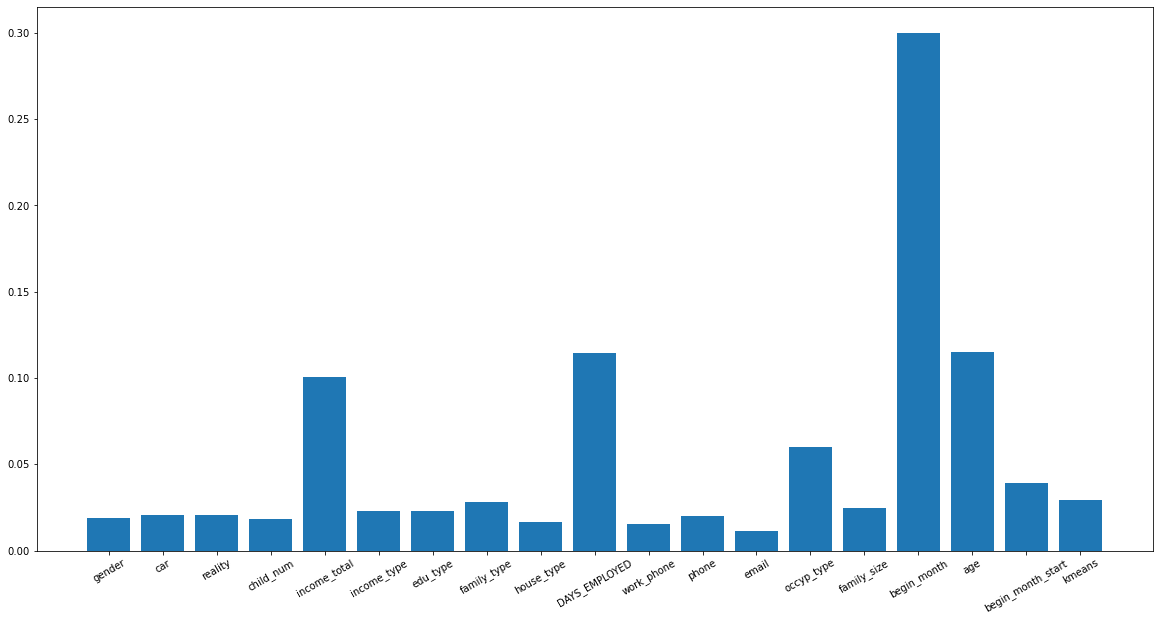

In [20]:
xK =xBegin.copy()
testFi = yBegin.copy()

clusterDf = xK[target_data]
kmeans = KMeans(n_clusters=6)
kmeans.fit(clusterDf)
kmeanPred = kmeans.predict(clusterDf)

clusterDfy = testFi[target_data]
kmeanPredy = kmeans.predict(clusterDfy)


pd.DataFrame(kmeanPred).value_counts()


xK['kmeans'] = kmeanPred
testFi['kmeans'] = kmeanPredy

rf = rf_model(xK,y,80)

In [21]:
testFi

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,age,begin_month_start,kmeans
index,,,,,,,,,,,,,,,,,,,
26457,1,1,0,0,112500.0,1,4,0,1,0,0,1,0,18,2.0,60.0,61.0,0,5
26458,0,0,1,0,135000.0,2,1,1,1,8671,0,1,0,3,2.0,36.0,53.0,0,0
26459,0,0,1,0,69372.0,4,4,1,1,217,1,1,0,8,2.0,40.0,44.0,0,5
26460,1,1,0,0,112500.0,0,4,1,1,2531,1,0,0,4,2.0,41.0,54.0,0,5
26461,0,1,1,0,225000.0,2,1,1,1,9385,1,0,0,10,2.0,8.0,50.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,1,0,202500.0,4,2,1,1,5434,1,1,0,0,2.0,19.0,52.0,0,4
36453,1,1,1,0,202500.0,4,4,0,1,1315,1,0,0,8,2.0,34.0,31.0,0,4
36454,0,0,1,0,292500.0,4,4,1,1,14018,0,0,0,11,2.0,55.0,59.0,0,3


In [22]:
final_Pred = rf.predict_proba(testFi)

In [23]:
sub  = pd.read_csv('../../../card/sample_submission.csv')
sub[['0','1','2']] =final_Pred
sub.to_csv("submission.csv",index=0)